***About The dataset:***
>This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

####**1. Data Extraction**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [104]:
# required library 
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib
import sklearn
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics as m
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
print(pd.__version__,np.__version__,sns.__version__,matplotlib.__version__,sklearn.__version__,sep="\n")

1.1.5
1.19.5
0.11.2
3.2.2
1.0.1


In [53]:
ds=pd.read_csv(r'/content/gdrive/MyDrive/ml datasets/diabetes.csv')  # to read dataset from .csv file
print(ds)

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]


####**2. Data Exploration**

In [54]:
ds.info() # to find detail about the column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [55]:
ds.shape # returns a tuple containing the dimensions (rows x columns) of a dataframe.

(768, 9)

In [56]:
ds.describe() # To get statistics for all the columns at the same time

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [57]:
ds.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [58]:
ds.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [59]:
cr = ds.corr() #correlation between two coloumns
print(cr)

                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


In [60]:
d=ds['Outcome'].value_counts() # to see the distribution between two classess
print(d)

0    500
1    268
Name: Outcome, dtype: int64


*visualizations*

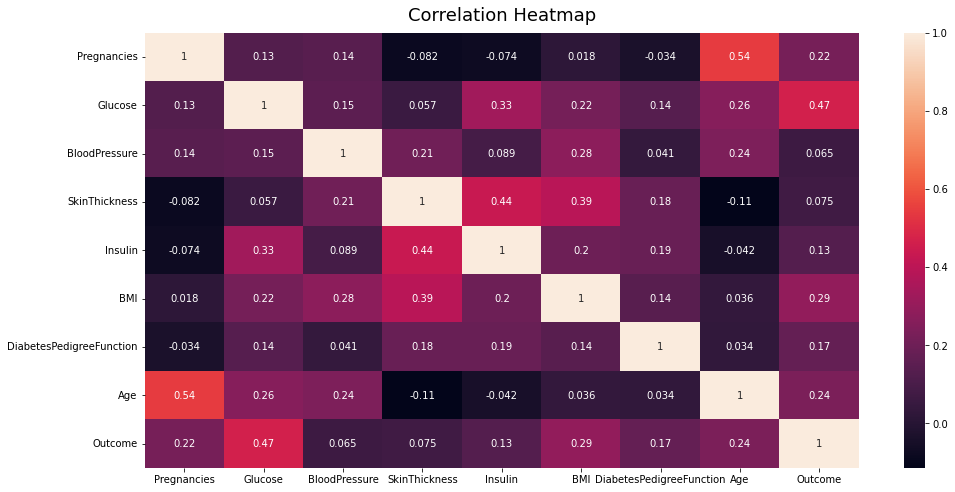

In [61]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(cr, annot = True) # by default pearson correlation
# Gives a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

Text(0.5, 1.0, 'Outcome:People with/without diabetes')

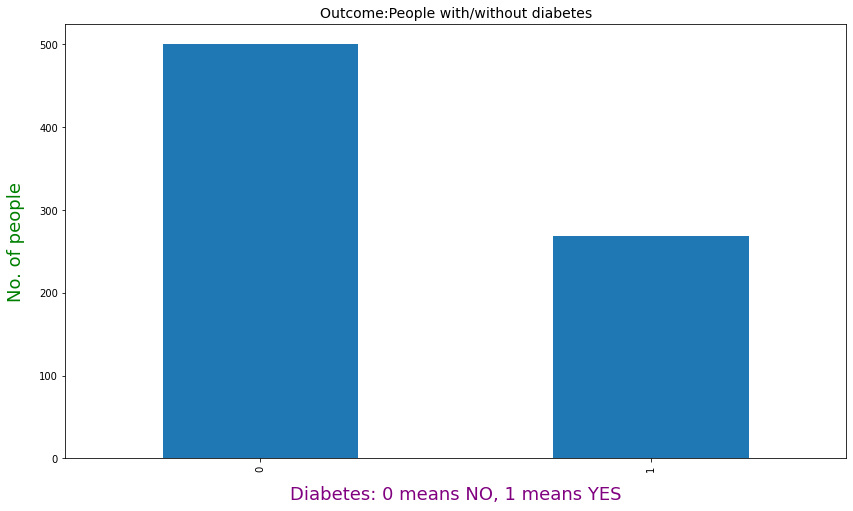

In [62]:
ds["Outcome"].value_counts().plot(kind='bar',figsize=(14,8))
plt.ylabel("No. of people", labelpad=14, fontsize=18, color='green')
plt.xlabel("Diabetes: 0 means NO, 1 means YES", labelpad=14, fontsize=18, color='purple')
plt.title("Outcome:People with/without diabetes", fontsize=14)

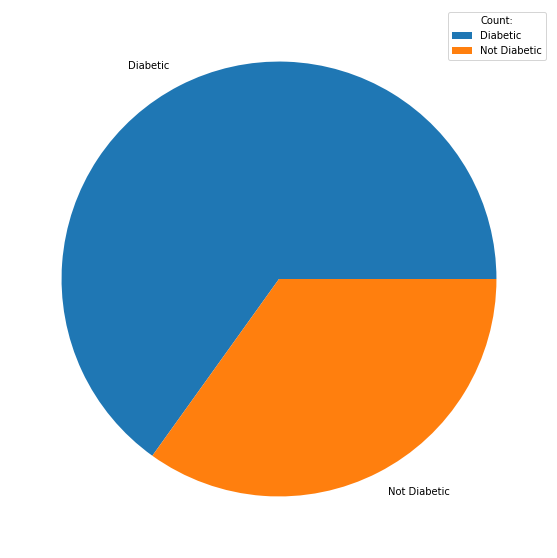

In [63]:
label=['Diabetic','Not Diabetic']
plt.pie(d,labels=label)
plt.legend(title = "Count:")
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

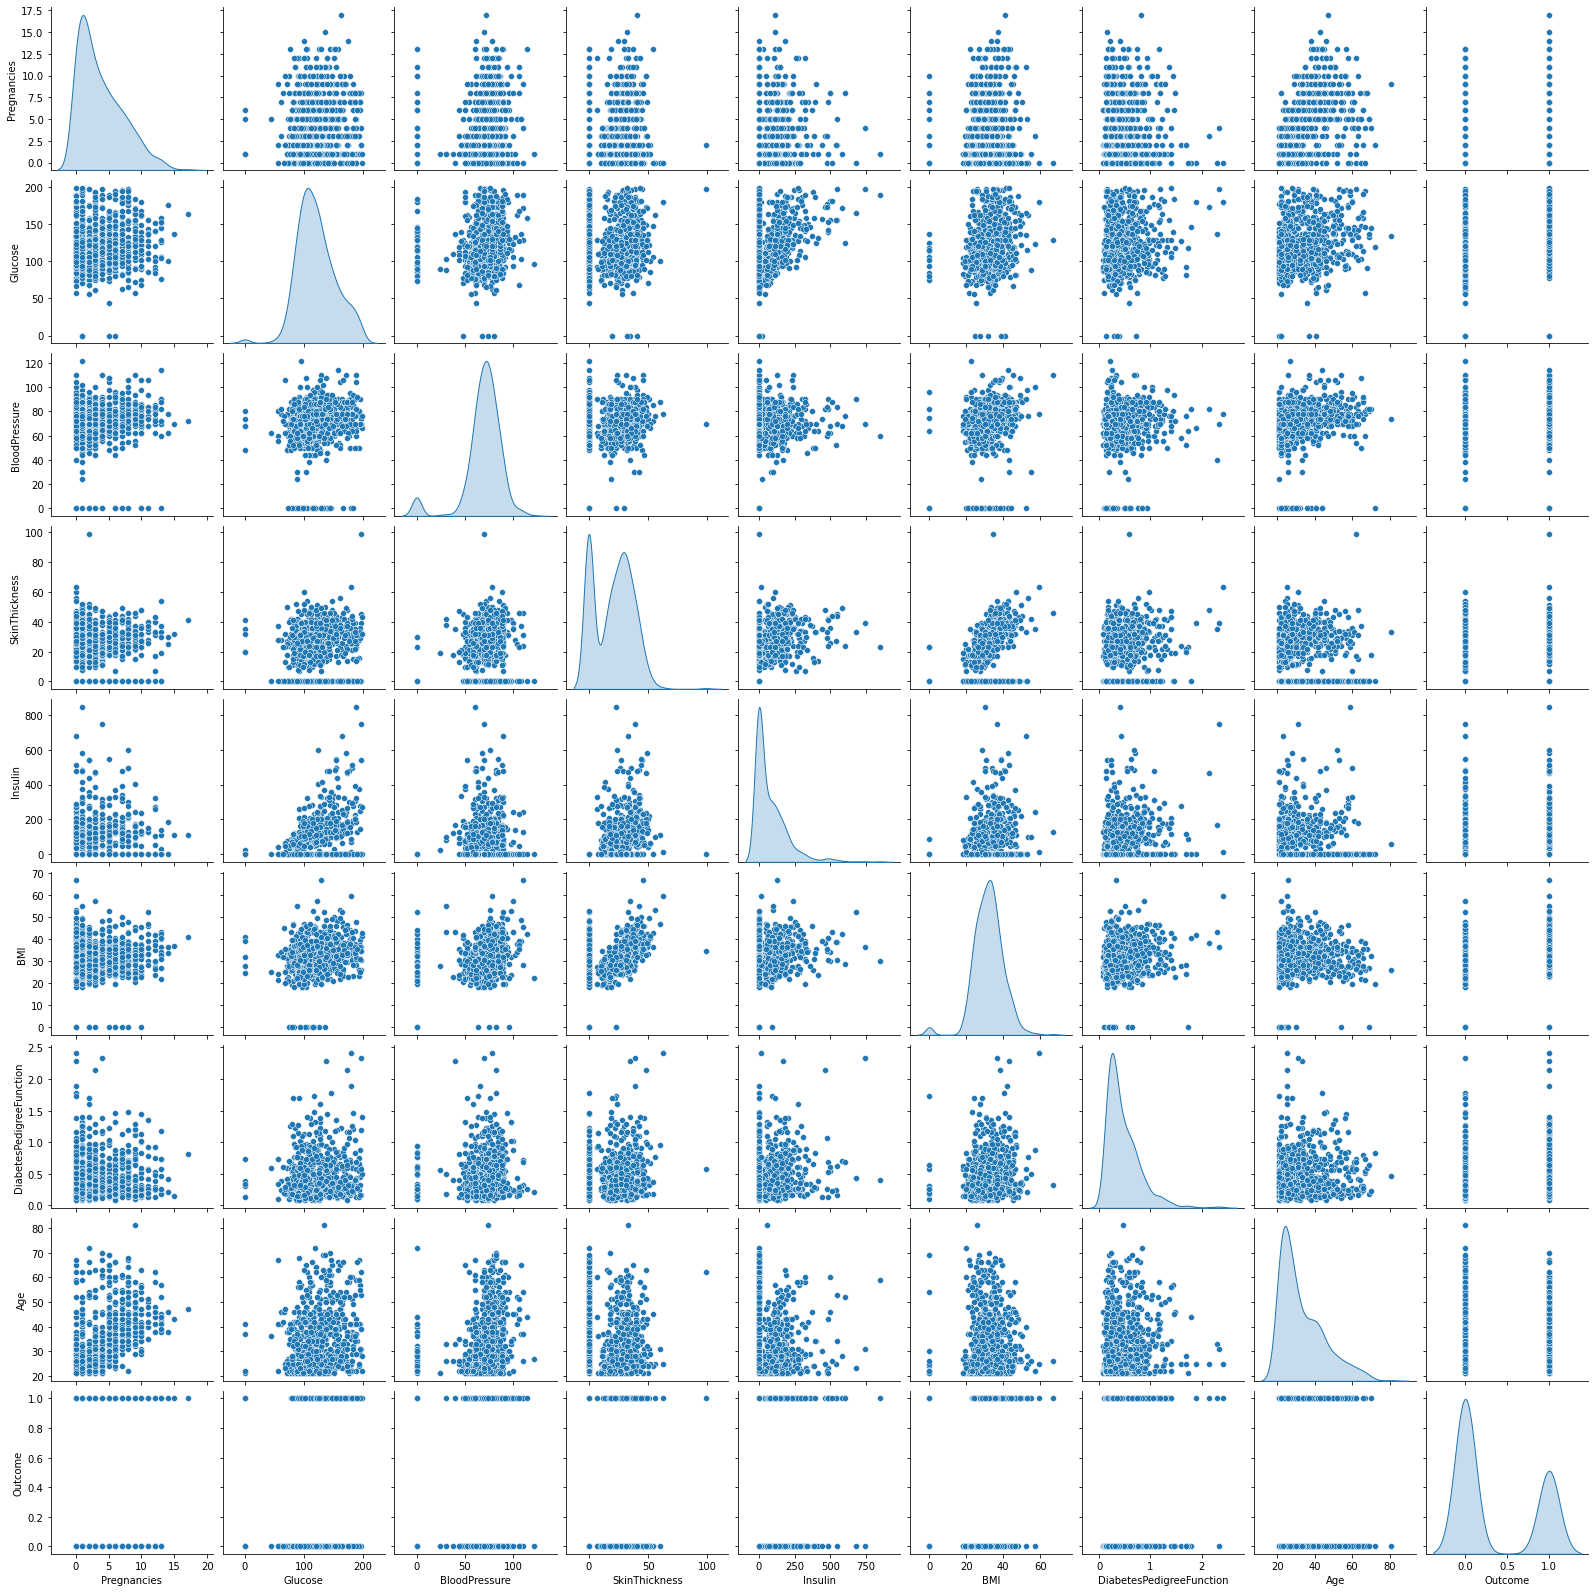

In [64]:
sns.pairplot(ds, diag_kind ='kde')

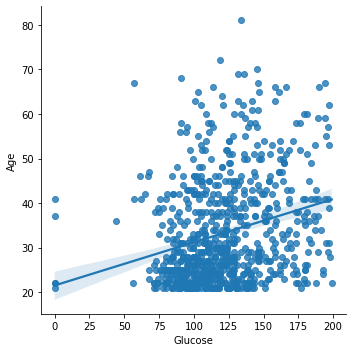

In [65]:
sns.lmplot(x='Glucose',y='Age',data=ds)

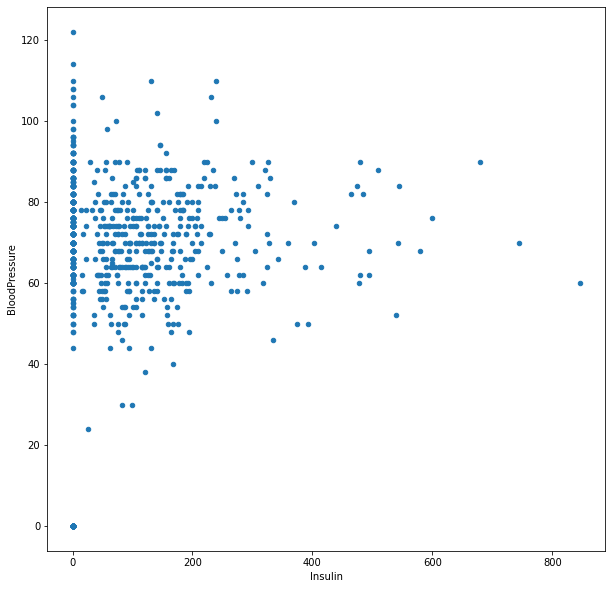

In [66]:
ds.plot(kind = 'scatter', y = 'BloodPressure', x = 'Insulin')
plt.show()

####**3. Data Preparation**

#####***I) Data Cleaning*** : i) Missing Values ii) Outliers iii) Variable Type iv) Format v) Wrong Data

In [67]:
ds.isnull().sum() #to check for missing/null value 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [68]:
ds.nunique() # to find no. of unique value in each column

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [69]:
print(ds.groupby('Pregnancies').Pregnancies.count()) # to check for unusal values here 17 pregnancies are normal

Pregnancies
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
Name: Pregnancies, dtype: int64


In [70]:
print(ds.groupby('BloodPressure').Insulin.count()) # avg blood pressure cannot be below 80 and here we have outlier blood pressure as zero.

BloodPressure
0      35
24      1
30      2
38      1
40      1
44      4
46      2
48      5
50     13
52     11
54     11
55      2
56     12
58     21
60     37
61      1
62     34
64     43
65      7
66     30
68     45
70     57
72     44
74     52
75      8
76     39
78     45
80     40
82     30
84     23
85      6
86     21
88     25
90     22
92      8
94      6
95      1
96      4
98      3
100     3
102     1
104     2
106     3
108     2
110     3
114     1
122     1
Name: Insulin, dtype: int64


In [82]:
#remove outliers
ds.drop(ds[ds["BloodPressure"] ==0].index, inplace = True)

In [83]:
d_col = ds.select_dtypes(include='float') # converted all float into int type

for c in d_col:
    ds[c] = ds[c].astype(int)

#####***II) Data Engineering***- requires Domain Knowledge
#####***III) Feature Selection***- selecting important features to get good model
*Taking all features into consideration.*

####**4. Modeling**

In [120]:
col=list(ds.columns)

In [85]:
#Splitting the data into independent variables 'X' and dependent variable 'Y'
X= ds.iloc[:,:7].values
Y = ds.iloc[:,8].values

In [86]:
#Building train and test dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=45)

In [87]:
#Feature scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [88]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [89]:
rf = RandomForestClassifier(n_estimators=200,criterion='entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [105]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [109]:
# to predict on Test part after modeling
pre1= lr.predict(X_test)
pre2= rf.predict(X_test)
pre3= nb.predict(X_test)
#cross validation score
cv1 = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
cv2 = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
cv3 = cross_val_score(estimator = nb, X = X_train, y = y_train, cv = 10)

In [116]:
print("Logistic Regression --")
print("Accuracy:\n",m.accuracy_score(y_test, pre1))
print("-------------")
print("Precision:\n",m.precision_score(y_test, pre1))
print("-------------")
print("Recall:\n",m.recall_score(y_test, pre1))
print("-------------")
print('Confusion Matrix:')
m.confusion_matrix(y_test, pre1)

Logistic Regression --
Accuracy:
 0.7636363636363637
-------------
Precision:
 0.6031746031746031
-------------
Recall:
 0.5846153846153846
-------------
Confusion Matrix:


array([[130,  25],
       [ 27,  38]])

In [117]:
print("Random Forest Classifier --")
print("Accuracy:\n",m.accuracy_score(y_test, pre2))
print("-------------")
print("Precision:\n",m.precision_score(y_test, pre2))
print("-------------")
print("Recall:\n",m.recall_score(y_test, pre2))
print("-------------")
print('Confusion Matrix:')
m.confusion_matrix(y_test, pre2)

Random Forest Classifier --
Accuracy:
 0.7636363636363637
-------------
Precision:
 0.5915492957746479
-------------
Recall:
 0.6461538461538462
-------------
Confusion Matrix:


array([[126,  29],
       [ 23,  42]])

In [118]:
print("Gaussian Naive Bayes --")
print("Accuracy:\n",m.accuracy_score(y_test, pre3))
print("-------------")
print("Precision:\n",m.precision_score(y_test, pre3))
print("-------------")
print("Recall:\n",m.recall_score(y_test, pre3))
print("-------------")
print('Confusion Matrix:')
m.confusion_matrix(y_test, pre3)

Gaussian Naive Bayes --
Accuracy:
 0.759090909090909
-------------
Precision:
 0.5857142857142857
-------------
Recall:
 0.6307692307692307
-------------
Confusion Matrix:


array([[126,  29],
       [ 24,  41]])

####**5. Evaluation Metrics**

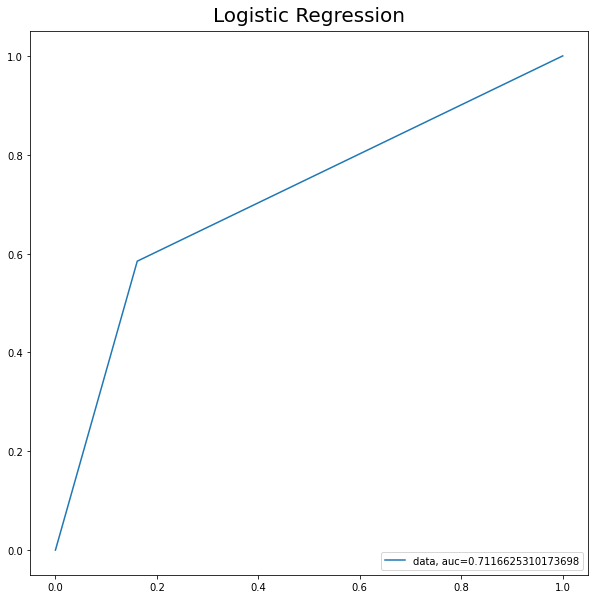

In [93]:
#roc curve
fpr, tpr, _ = m.roc_curve(y_test,pre1)
auc = m.roc_auc_score(y_test,pre1)
plt.title('Logistic Regression',fontdict={'fontsize':20},pad=10)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

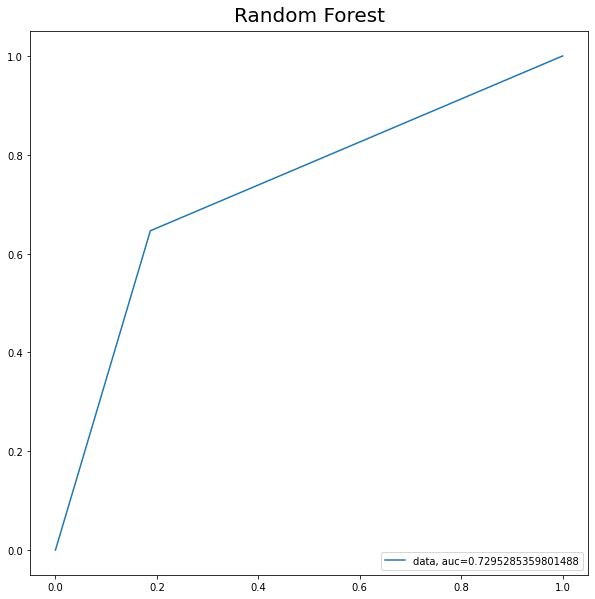

In [95]:
#roc curve
fp, tp, _ = m.roc_curve(y_test,pre2)
au = m.roc_auc_score(y_test,pre2)
plt.title('Random Forest',fontdict={'fontsize':20},pad=10)
plt.plot(fp,tp,label="data, auc="+str(au))
plt.legend(loc=4)
plt.show()

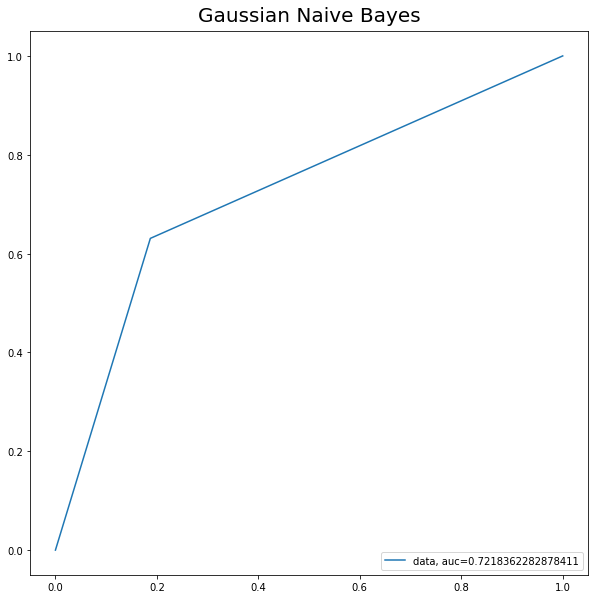

In [119]:
#roc curve
f, t, _ = m.roc_curve(y_test,pre3)
a = m.roc_auc_score(y_test,pre3)
plt.title('Gaussian Naive Bayes',fontdict={'fontsize':20},pad=10)
plt.plot(f,t,label="data, auc="+str(a))
plt.legend(loc=4)
plt.show()

**According to ROC curve , Random Forest classifier is good.**

####***6. Take input from User to predict***

In [133]:
li=[]
for i in col[:-1]:
  print("%s:"%i)
  li.append(float(input("Enter numerical value ")))

Pregnancies:
Enter numerical value 5
Glucose:
Enter numerical value 95
BloodPressure:
Enter numerical value 120
SkinThickness:
Enter numerical value 2.23
Insulin:
Enter numerical value 190
BMI:
Enter numerical value 22.1
DiabetesPedigreeFunction:
Enter numerical value 0
Age:
Enter numerical value 22


In [136]:
l = pd.DataFrame([li])
l.drop(l.columns[[0]], axis = 1, inplace = True)

In [137]:
predictionProbability = rf.predict_proba(l)
prediction = rf.predict(l)
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[0.315 0.685]]
prediction: [1]
